<a href="https://colab.research.google.com/github/tushig0826/generator/blob/main/generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Transformers API -> https://huggingface.co/docs/transformers/index

In [ ]:
!pip install diffusers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 9.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for diffusers: filename=diffusers-0.21.2-py3-none-any.whl size=1489250 sha256=080a6e048a36b9d6cdb5ba57769ddfbc3265cae6cb2ba9cd4f56f84598648eff
  Stored in directory: /root/.cache/pip/wheels/2e/09/32/11c9e42c397d3f3494226b28ba68c4ad4718a68a65dba14ea6
Successfully built diffusers


In [2]:
!nvidia-smi
# !nvidia-smi -L
# !/usr/local/cuda/bin/nvcc --version

# !nvidia-smi --gpus

Tue Sep 26 21:08:38 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
!pip install diffusers==0.11.1
!pip install transformers scipy ftfy accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.9/524.9 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 24.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 54.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.1/258.1 kB 30.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 122.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 85.6 MB/s eta 0:00:00


In [4]:
import torch
from diffusers import StableDiffusionPipeline

pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4", torch_dtype=torch.float16)

safety_checker/pytorch_model.fp16.safetensors not found


Fetching 30 files:   0%|          | 0/30 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.
The config attributes {'scaling_factor': 0.18215} were passed to AutoencoderKL, but are not expected and will be ignored. Please verify your config.json configuration file.


In [5]:
pipe = pipe.to("cuda")

  0%|          | 0/50 [00:00<?, ?it/s]

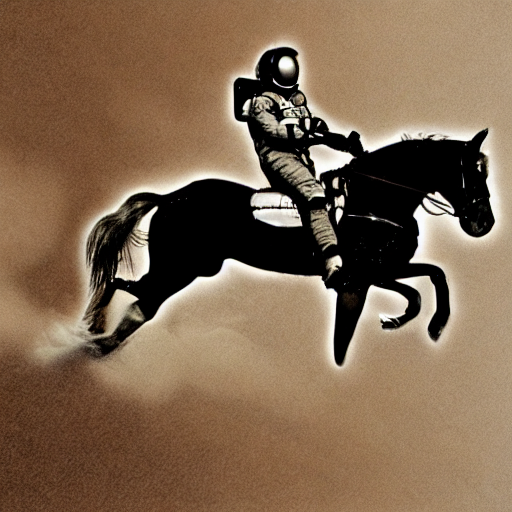

In [7]:
prompt = "a photograph of an astronaut riding a horse"
image = pipe(prompt).images[0]  # image here is in [PIL format](https://pillow.readthedocs.io/en/stable/)

# Now to display an image you can either save it such as:
image.save(f"astronaut_rides_horse.png")

# or if you're in a google colab you can directly display it with
image

In [13]:
from PIL import Image
from google.colab import files
from typing import List

class ImageCaptionGenerator:
    def __init__(self, k: int):
        self.k = k

    def generate_captions(self, images: List[PIL.Image.Image]) -> List[str]:
        captions = []
        for i in range(self.k):
            # Generate caption for each image
            caption = f"Caption for image {i+1}"
            captions.append(caption)
        return captions

# Upload an image file
uploaded_files = files.upload()

# Load the uploaded image from file
image = Image.open(next(iter(uploaded_files)))

# Create an instance of the ImageCaptionGenerator class
generator = ImageCaptionGenerator(k=1)

# Generate captions for the image
captions = generator.generate_captions([image])

# Display the generated caption(s)
for i, caption in enumerate(captions):
    print(f"Caption for image {i+1}: {caption}")


Saving Funny-Cat-Costumes-Pirate-Suit-Cat-Clothes-Kitty-Kitten-Corsair-Halloween-Costume-Puppy-Suits-Dressing-Up.jpg_Q90.jpg_.webp to Funny-Cat-Costumes-Pirate-Suit-Cat-Clothes-Kitty-Kitten-Corsair-Halloween-Costume-Puppy-Suits-Dressing-Up.jpg_Q90.jpg_.webp
Caption for image 1: Caption for image 1


In [21]:
!pip install transformers


In [22]:

from transformers import VisionEncoderDecoderModel, ViTFeatureExtractor, AutoTokenizer
import torch
from PIL import Image


In [23]:
model = VisionEncoderDecoderModel.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
feature_extractor = ViTFeatureExtractor.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
tokenizer = AutoTokenizer.from_pretrained("nlpconnect/vit-gpt2-image-captioning")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)



max_length = 16
num_beams = 4
gen_kwargs = {"max_length": max_length, "num_beams": num_beams}
def predict_step(image_paths):
  images = []
  for image_path in image_paths:
    i_image = Image.open(image_path)
    if i_image.mode != "RGB":
      i_image = i_image.convert(mode="RGB")

    images.append(i_image)

  pixel_values = feature_extractor(images=images, return_tensors="pt").pixel_values
  pixel_values = pixel_values.to(device)

  output_ids = model.generate(pixel_values, **gen_kwargs)

  preds = tokenizer.batch_decode(output_ids, skip_special_tokens=True)
  preds = [pred.strip() for pred in preds]
  return preds

predict_step(['/content/download (1).jpg'])

We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.
You may ignore this warning if your `pad_token_id` (50256) is identical to the `bos_token_id` (50256), `eos_token_id` (50256), or the `sep_token_id` (None), and your input is not padded.


['a black and white photo of a blue and white airplane']

In [24]:
import torch
from PIL import Image
from transformers import VisionEncoderDecoderModel, ViTFeatureExtractor, AutoTokenizer

class ImageCaptionGenerator:
    def __init__(self):
        self.model = VisionEncoderDecoderModel.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
        self.feature_extractor = ViTFeatureExtractor.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
        self.tokenizer = AutoTokenizer.from_pretrained("nlpconnect/vit-gpt2-image-captioning")

        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.model.to(self.device)

        self.max_length = 16
        self.num_beams = 4
        self.gen_kwargs = {"max_length": self.max_length, "num_beams": self.num_beams}

    def predict_step(self, image_paths):
        images = []
        for image_path in image_paths:
            i_image = Image.open(image_path)
            if i_image.mode != "RGB":
                i_image = i_image.convert(mode="RGB")

            images.append(i_image)

        pixel_values = self.feature_extractor(images=images, return_tensors="pt").pixel_values
        pixel_values = pixel_values.to(self.device)

        output_ids = self.model.generate(pixel_values, **self.gen_kwargs)

        preds = self.tokenizer.batch_decode(output_ids, skip_special_tokens=True)
        preds = [pred.strip() for pred in preds]
        return preds


In [25]:
generator = ImageCaptionGenerator()


In [27]:
image_paths = ["/content/download (1).jpg", "/content/Funny-Cat-Costumes-Pirate-Suit-Cat-Clothes-Kitty-Kitten-Corsair-Halloween-Costume-Puppy-Suits-Dressing-Up.jpg_Q90.jpg_.webp"]
captions = generator.predict_step(image_paths)
print(captions)


['a black and white photo of a blue and white airplane', 'a cat that is wearing a hat']
